In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/gifts.csv')

In [27]:
df

,GiftId,Latitude,Longitude,Weight
0,1,0.000087,3.351328e-05,1.000000
1,2,0.000066,1.521944e-04,15.524480
2,3,0.000148,3.191674e-04,8.058499
3,4,0.000236,5.854307e-04,1.000000
4,5,-0.000371,4.675763e-04,25.088892
...,...,...,...,...
99995,99996,-0.000458,-1.062862e-04,10.927676
99996,99997,0.000214,-5.884906e-04,9.347134
99997,99998,0.000225,6.286629e-08,1.000000
99998,99999,-0.000404,-5.419469e-05,1.000000


# Dataframe statistics

In [30]:
df.describe()

,GiftId,Latitude,Longitude,Weight
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,0.000070,0.000099,14.098391
std,28867.657797,0.000232,0.000439,14.080697
min,1.000000,-0.000478,-0.000957,1.000000
25%,25000.750000,-0.000065,-0.000309,1.000000
50%,50000.500000,0.000123,0.000141,10.013013
75%,75000.250000,0.000250,0.000465,23.465783
max,100000.000000,0.000443,0.000957,50.000000


Number of rows :  100000
 
Min Weight:  1.0
Max Weight:  50.0
Min Longitude:  -0.0009568567935853948
Max Longitude:  0.0009569042929842566
Min Latitude:  -0.0004784548223114762
Max Latitude:  0.0004434479527842422


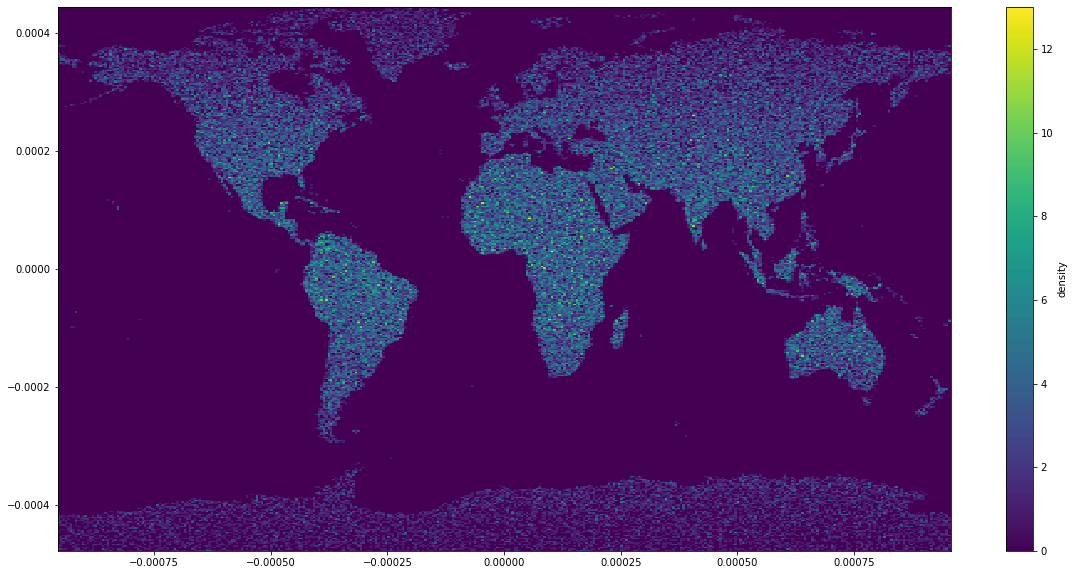

In [17]:

print("Number of rows : ", len(df))
print(" ")
print("Min Weight: ", df.Weight.min())
print("Max Weight: ", df.Weight.max())

print("Min Longitude: ",df.Longitude.min())
print("Max Longitude: ",df.Longitude.max())
print("Min Latitude: ",df.Latitude.min())
print("Max Latitude: ",df.Latitude.max())

plt.rcParams['figure.figsize'] = 20, 10
plt.hist2d(df.Longitude, df.Latitude, bins=360)
cb = plt.colorbar()
cb.set_label("density")

# Harvesine Distance

- extract lat & lon
- stack values into np.array
- reshape np.array to (-1,2)
- convert lat & lon to radians
- compute pairwise harvesine distance using sklearn


## Basic examples (Sklearn)

### 1. using lists

In [7]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

bsas = [-34.83333, -58.5166646]
paris = [49.0083899664, 2.53844117956]
london = [51.5074, 0.1278]

bsas_in_radians = [radians(_) for _ in bsas]
paris_in_radians = [radians(_) for _ in paris]
london_in_radians = [radians(_) for _ in london]

print(bsas_in_radians)
print(paris_in_radians)
print(london_in_radians)
result = haversine_distances([bsas_in_radians, paris_in_radians,london_in_radians])
result * 6371000/1000  # multiply by Earth radius to get kilometers

[-0.6079562979337163, -1.0213084645552106]
[0.8553577660150332, 0.04430415645153058]
[0.8989737191417272, 0.002230530784048753]


array([[    0.        , 11099.54035582, 11168.54866312],
       [11099.54035582,     0.        ,   326.43123568],
       [11168.54866312,   326.43123568,     0.        ]])

### 2. using np.arrays

In [8]:
bsas = [-34.83333, -58.5166646]
paris = [49.0083899664, 2.53844117956]
london = [51.5074, 0.1278]

cities = np.array([bsas,paris,london])
cities_radian = np.radians(cities)
result = haversine_distances(cities_radian)
result * 6371000/1000  # multiply by Earth radius to get kilometers

array([[    0.        , 11099.54035582, 11168.54866312],
       [11099.54035582,     0.        ,   326.43123568],
       [11168.54866312,   326.43123568,     0.        ]])

### Pandas and Numpy

In [13]:
# The first number is always the latitude and the second is the longitude ;)
coords = df[['Latitude','Longitude']].head(10).to_numpy()
coords = np.radians(coords)
result = haversine_distances(coords)
result * 6371000/1000  # multiply by Earth radius to get kilomet
#df['Latitude'] = coords[:,0]
#df['Longitude'] = coords[:,1]

array([[0.        , 0.01339168, 0.03247639, 0.06357609, 0.07018847,
        0.05091333, 0.04359561, 0.04416526, 0.06296051, 0.05804508],
       [0.01339168, 0.        , 0.02065253, 0.05174037, 0.05999858,
        0.06390218, 0.03035228, 0.05639015, 0.0495695 , 0.04599185],
       [0.03247639, 0.02065253, 0.        , 0.03119717, 0.06004001,
        0.079156  , 0.01471014, 0.07655198, 0.03515323, 0.02557922],
       [0.06357609, 0.05174037, 0.03119717, 0.        , 0.06881952,
        0.10741888, 0.02578672, 0.10771651, 0.02785765, 0.00597779],
       [0.07018847, 0.05999858, 0.06004001, 0.06881952, 0.        ,
        0.11913556, 0.04915071, 0.09785693, 0.04199948, 0.06454917],
       [0.05091333, 0.06390218, 0.079156  , 0.10741888, 0.11913556,
        0.        , 0.09263436, 0.03559322, 0.11286995, 0.10286047],
       [0.04359561, 0.03035228, 0.01471014, 0.02578672, 0.04915071,
        0.09263436, 0.        , 0.0863855 , 0.0205778 , 0.01992437],
       [0.04416526, 0.05639015, 0.0765519

## Why Not to calculate pairwise distance between all locations..
- The adj. Matrix of the complet craph would need n**2 * np.float memory
- As calculated below, this would not be wise :D but for each tour it would be no problem (mean weight = 14.xx --> 70 stops on a maximum capacity of 1000) 
- Nevertheless, it could be useful to just transform the coordinates into radians anyway. That way, it wouldn't be necessary to do the calculations each time a sample is used for the weighted reindeer wearniess...

In [15]:
adj_mat_size = len(df)
print("Adj Matrix dimension: (" ,adj_mat_size,",",adj_mat_size,")")
print("Memory needed (GB):", (adj_mat_size**2)*8/10**9 ) # roughly 8 bytes for a float in numpy arrays

Adj Matrix dimension: ( 100000 , 100000 )
Memory needed (GB): 80.0


# Weighted reindeer weariness

$$WRW = \sum\limits_{j=1}^{m} \sum\limits_{i=1}^{n} \Big[ \big( \sum\limits_{k=1}^{n} w_{kj} - \sum\limits_{k=1}^{i} w_{kj} \big) \cdot Dist(Loc_i, Loc_{i-1}) \Big]_j ,$$

$$m := \text{number of trips} $$
$$j := \text{one specific trip}$$
$$n := \text{nmber of gifts (per trip j) }$$
$$w_{ij} := \text{weight of the }i^{th} \text{ gift at trip j}$$ 
$$Loc_{0}\text{ and } Loc_{0} \text{is the north pole for each trip j}$$ 
$$w_{nj} := \text{is the weight of the empty sled}$$ 

## Mini Example
Example with the first ten entries:
- trip 1 = entries 0:4
- trip 2 = entries 5:9

trip1 : North_Pole --> 0 --> 1 --> 2 --> 3 --> 4 --> North_Pole\
trip2 : North_Pole --> 5 --> 6 --> 7 --> 8 --> 9 --> North_Pole

In [ ]:
def weighted_reindeer_weariness(trips):
    weighted_weariness = 0
    for trip in trips:
        weights = trip['Weight'].to_numpy()
        coordinates = trip[['Latitude','Longitude']].to_numpy()
        weighted_weariness = weighted_weariness + weighted_distance(coordinates,weights,sleigh_weight)
    return weighted_weariness
    
def weighted_distance(coordinates,weights,sleigh_weight):
    startweight = sleigh_weight + np.sum(weights)
    if startweight > weight_limit:
        return -1

    north_pole = np.radians([90,0])
    coords = np.vstack((north_pole,coordinates,north_pole))
  
    adj_matrix = haversine_distances(coords,np.roll(coords.copy(),-1,axis=0))
    adj_matrix = adj_matrix * 6371 #6371000/1000
    distances = np.diag(adj_matrix)[:-1]
    
    weights +=sleigh_weight
    weights = np.append(weights,sleigh_weight)
    weights = np.cumsum(weights[::-1])[::-1] # flip, cummulative sum, flip again

    """
    print(coords)
    for i in range(len(coords)-1):
        print(haversine_distances([coords[i],coords[i+1]])[0][1]*6371)
    
    with np.printoptions(precision=3, suppress=True):
        print(distances,2)
    """
    weighted_dist = np.sum(weights*distances)
    print("weighted_dist ",weighted_dist)


    return weighted_dist


In [132]:
    
weight_limit = 1000
sleigh_weight = 10

entries = df.head(10)
trip1 = entries[:5].copy()
trip2 = entries[5:].copy()

trips = [trip1.copy(),trip2.copy()]

WRW = weighted_reindeer_weariness(trips)
print("Total Wariness: ", WRW)

weighted_dist  1208033.6244161366
weighted_dist  1901735.7154453115
Total Wariness:  3109769.339861448
